# PCML Project-1 ~ Team #60

## Initial Python Imports

In [1]:
# Useful starting lines
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import datetime

from costs import compute_loss

%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
from helpers import *

DATA_TRAIN_PATH = "../Data/train.csv" # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

#print the shape of the offset x matrix.
print('original tX shape: ',tX.shape)

original tX shape:  (250000, 30)


## Data preprocessing

### Standardization

In [3]:
#standardization
tX, mean_x, std_x = standardize(tX, mean_x=None, std_x=None)
print('standardized tX shape: ',tX.shape)
print('tX mean shape: ',mean_x.shape)
print('tX std shape: ',std_x.shape)

standardized tX shape:  (250000, 31)
tX mean shape:  (30,)
tX std shape:  (30,)


### Analysis of output y

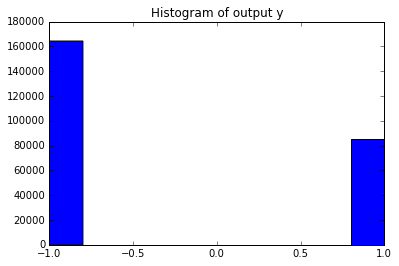

In [4]:
# Histogram of output y
plt.hist(y, bins=10, align='mid')
plt.title("Histogram of output y")
plt.show()

### Analysis of y as a function of all its features (one by one)

feature:  0


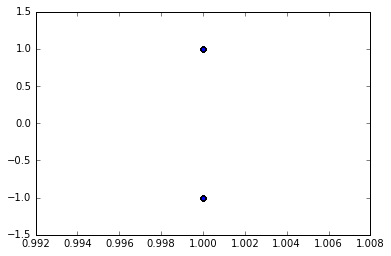

feature:  1


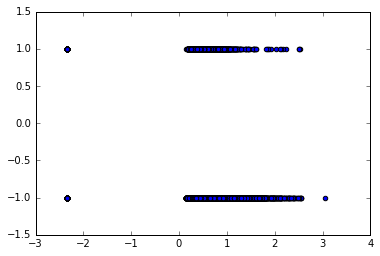

feature:  2


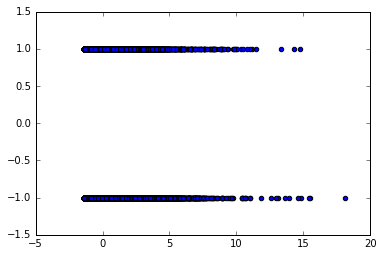

feature:  3


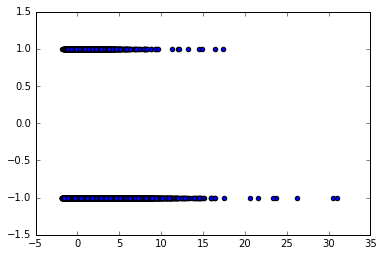

feature:  4


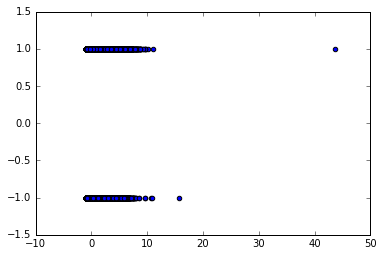

feature:  5


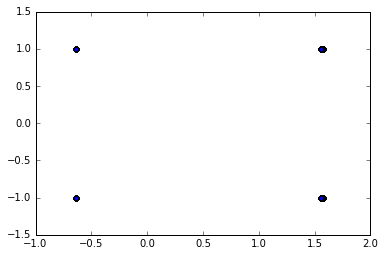

feature:  6


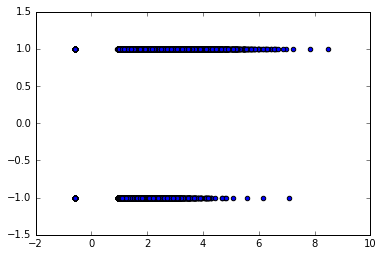

feature:  7


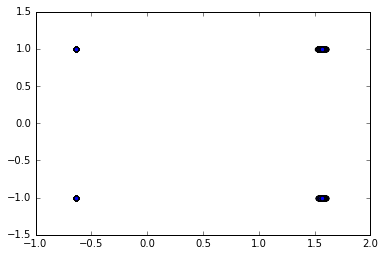

feature:  8


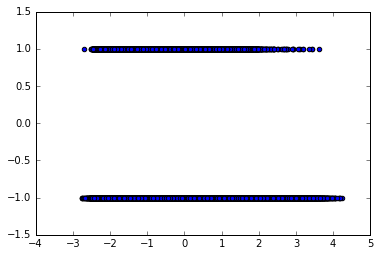

feature:  9


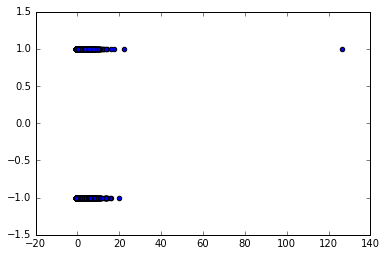

feature:  10


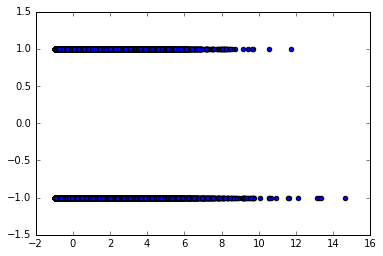

feature:  11


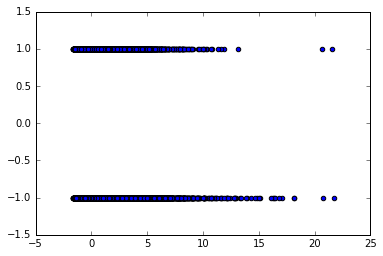

feature:  12


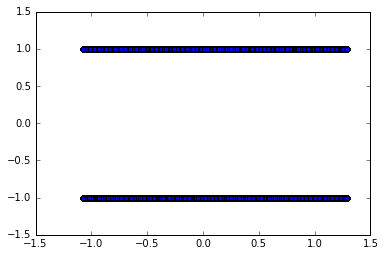

feature:  13


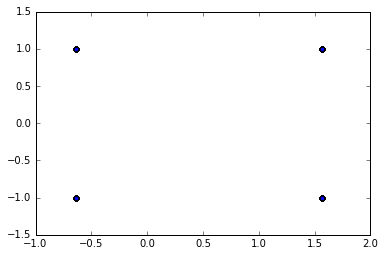

feature:  14


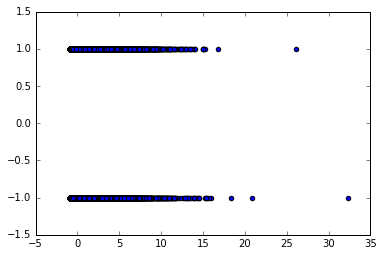

feature:  15


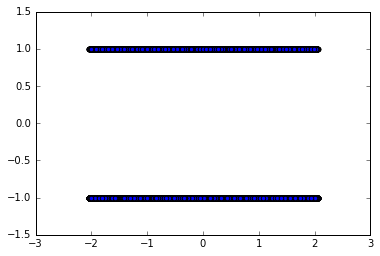

feature:  16


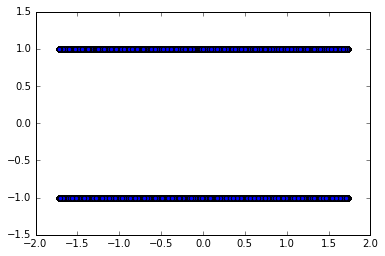

feature:  17


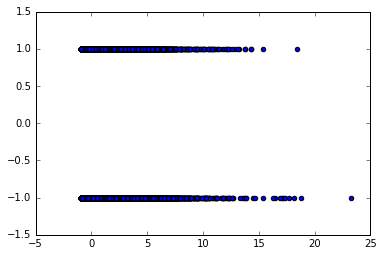

feature:  18


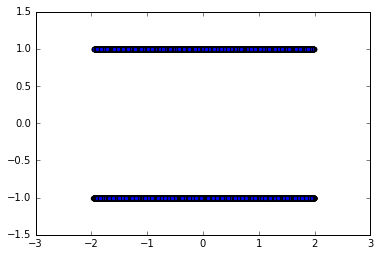

feature:  19


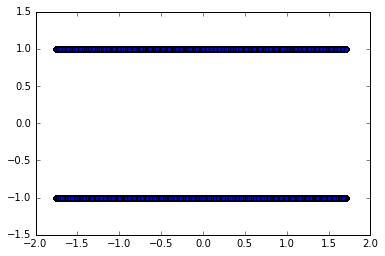

feature:  20


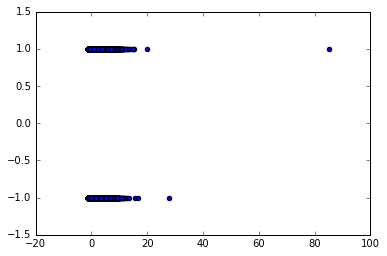

feature:  21


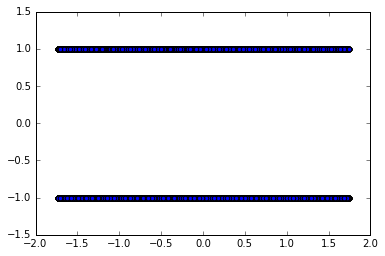

feature:  22


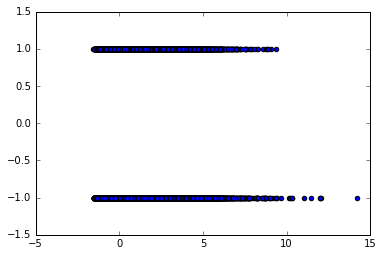

feature:  23


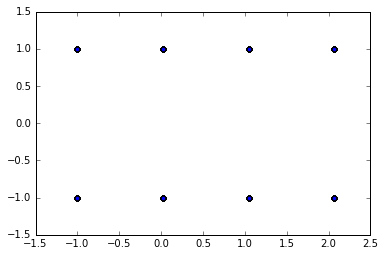

feature:  24


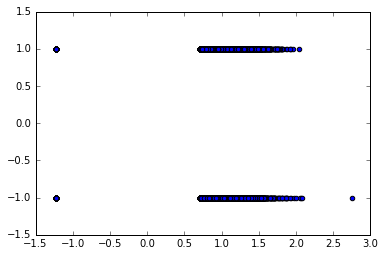

feature:  25


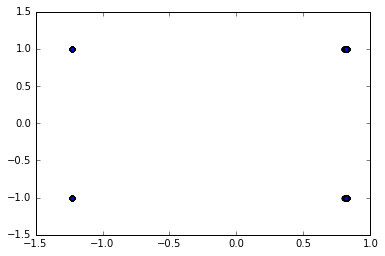

feature:  26


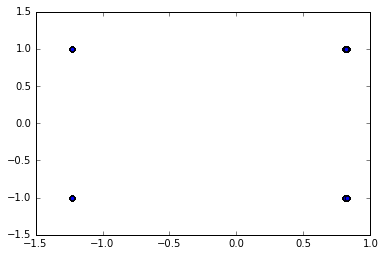

feature:  27


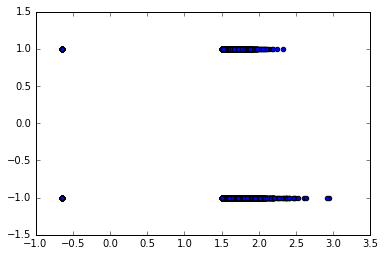

feature:  28


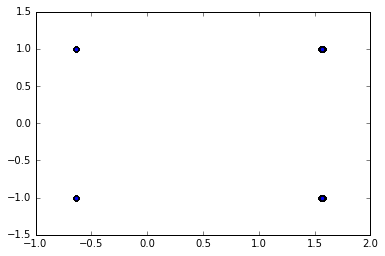

feature:  29


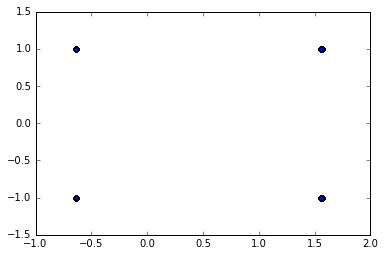

feature:  30


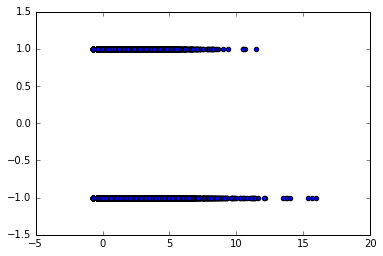

In [10]:
# Analyse y as a function of all the other features (one by one)
for feature in range(31):
    print('feature: ',feature)
    plt.scatter(tX[:,feature], y)
    plt.show()

## Linear regression using gradient descent

In [5]:
from gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 1000
gamma = 0.01

# Initialization
w_initial = np.zeros(tX.shape[1])

# Start gradient descent.
# start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tX, w_initial, max_iters, gamma)
# end_time = datetime.datetime.now()


Gradient Descent(0/999): loss=0.5
Gradient Descent(1/999): loss=0.4930403211757793
Gradient Descent(2/999): loss=0.4870098501022072
Gradient Descent(3/999): loss=0.4817168268664753
Gradient Descent(4/999): loss=0.4770128047663221
Gradient Descent(5/999): loss=0.4727827104481938
Gradient Descent(6/999): loss=0.4689371916527971
Gradient Descent(7/999): loss=0.4654067258061777
Gradient Descent(8/999): loss=0.4621370840030196
Gradient Descent(9/999): loss=0.45908583830059513
Gradient Descent(10/999): loss=0.45621967211044767
Gradient Descent(11/999): loss=0.4535123087925472
Gradient Descent(12/999): loss=0.45094291613495796
Gradient Descent(13/999): loss=0.4484948771748208
Gradient Descent(14/999): loss=0.4461548430418665
Gradient Descent(15/999): loss=0.4439120029218537
Gradient Descent(16/999): loss=0.4417575211821269
Gradient Descent(17/999): loss=0.4396841032046329
Gradient Descent(18/999): loss=0.43768566032584444
Gradient Descent(19/999): loss=0.43575705109814233
Gradient Descent(20/

## Linear regression using stochastic gradient descent

In [14]:
from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 1000
gamma = 0.01
batch_size = 50

# Initialization
w_initial = np.zeros(tX.shape[1])

# Start SGD.
# start_time = datetime.datetime.now()
stoch_gradient_losses, stoch_gradient_ws = stochastic_gradient_descent(y, tX, w_initial, batch_size, max_iters, gamma)
# end_time = datetime.datetime.now()

Stochastic Gradient Descent(0/999): loss=0.5
Stochastic Gradient Descent(1/999): loss=0.49255964155613674
Stochastic Gradient Descent(2/999): loss=0.4830045035755656
Stochastic Gradient Descent(3/999): loss=0.48963520143568695
Stochastic Gradient Descent(4/999): loss=0.4830861019588542
Stochastic Gradient Descent(5/999): loss=0.4842091944147834
Stochastic Gradient Descent(6/999): loss=0.46065835765291985
Stochastic Gradient Descent(7/999): loss=0.4462197921274281
Stochastic Gradient Descent(8/999): loss=0.4590689438309799
Stochastic Gradient Descent(9/999): loss=0.48039865481513166
Stochastic Gradient Descent(10/999): loss=0.4831613470040633
Stochastic Gradient Descent(11/999): loss=0.46009488602842086
Stochastic Gradient Descent(12/999): loss=0.46336136850899157
Stochastic Gradient Descent(13/999): loss=0.4451052990839828
Stochastic Gradient Descent(14/999): loss=0.45534398935893156
Stochastic Gradient Descent(15/999): loss=0.4316697698023681
Stochastic Gradient Descent(16/999): loss=

## Least squares regression using normal equations

In [11]:
from least_squares import *

# start_ls_time = datetime.datetime.now()
ls_wopt, ls_loss = least_squares(y,tX)
# end_ls_time = datetime.datetime.now()
print(ls_loss)
print(ls_wopt)


0.339445598489
[ -3.14664000e-01   2.93788272e-02  -2.52531475e-01  -2.54791124e-01
  -3.03696824e-02  -1.40144704e+00   2.95701640e-01  -1.07889472e+01
   2.67880862e-01  -2.44934969e-03  -3.28830597e+02  -1.82647888e-01
   1.14039627e-01   2.05045958e+01   6.38859283e+01  -3.18961897e-04
  -1.80884298e-03   6.29950711e+01  -4.48641567e-04   1.54379297e-03
   1.21462700e-01   3.95268725e-04  -6.33223476e-02  -2.06747093e-01
  -1.16655766e-01   9.86256511e-02   1.67907699e-01  -3.35146235e-02
  -2.98358673e+00  -5.36388100e+00   2.78481517e+02]


## Ridge regression using normal equations

In [12]:
from ridge_regression import ridge_regression

# lambdas = np.logspace(-3, 1, 10)      
# φ_x = build_poly(x, degree)
# x_train, x_test, y_train, y_test = split_data(tX, y, ratio, seed)
    
#     for lamb in lambdas:

w_ridge = ridge_regression(y, tX, 0.01)
print(w_ridge)

# rmse_tr = np.sqrt(2*compute_loss(y, tX, w_ridge))
# rmse_te = np.sqrt(2*compute_loss(y, tX, w_ridge))


[ -3.14663987e-01   2.93692776e-02  -2.52535106e-01  -2.54808112e-01
  -3.02807868e-02  -1.22225930e-01   2.93512860e-01  -1.04615295e+01
   2.67885623e-01  -2.49367968e-03  -8.62156082e-02  -1.82654162e-01
   1.14032925e-01   1.85902424e+01   2.08692849e-01  -3.36948845e-04
  -1.78487827e-03   3.04213789e-01  -4.61246031e-04   1.57011969e-03
   1.21475593e-01   4.21873337e-04  -6.32672153e-02  -2.06561214e-01
  -1.14807265e-01   1.02382093e-01   1.62282747e-01  -2.26206531e-02
  -2.85637292e+00  -5.19227765e+00  -9.72795731e-04]


## Logistic regression using gradient descent or SGD

## Regularized logistic regression using gradient descent or SGD

## Generate predictions and save ouput in csv format for submission:

In [9]:
DATA_TEST_PATH = "../Data/test.csv" # TODO: download test data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)